<a href="https://colab.research.google.com/github/KenDaupsey/Non-Parametric-Survival-Analysis-3-Using-Python/blob/main/Non_Parametric_Survival_Analysis_3_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Non-Parametric Survival Analysis 3 Using Python***

*** Kaplan Meier Estimator Using Python ~ 2 ***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url= "https://raw.githubusercontent.com/KenDaupsey/Non-Parametric-Survival-Analysis-3-Using-Python/main/Survival%7ECatheter%7EInfection.csv"
df= pd.read_csv(url)
df.head()

,patient,time,infect,age,female
0,1,16,1,28.0,0
1,1,8,1,28.0,0
2,2,13,0,48.0,1
3,2,23,1,48.0,1
4,3,22,1,32.0,0


In [7]:
df.isnull().sum()

patient    0
time       0
infect     0
age        0
female     0
dtype: int64

In [9]:
! pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=ad628161c926ef9e105412b5864c8c7943fbc993314ec887f4b928ff88c1b744
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [10]:
### Import Necessary Libraries for Kaplan Meier Survival Procedure
from lifelines import KaplanMeierFitter
from lifelines.utils import survival_table_from_events

In [12]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   patient  76 non-null     int64  
 1   time     76 non-null     int64  
 2   infect   76 non-null     int64  
 3   age      76 non-null     float64
 4   female   76 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 KB
None
        patient        time     infect        age     female
count  76.00000   76.000000  76.000000  76.000000  76.000000
mean   19.50000   97.684211   0.763158  43.697368   0.736842
std    11.03872  128.342377   0.427970  14.737951   0.443273
min     1.00000    2.000000   0.000000  10.000000   0.000000
25%    10.00000   16.000000   1.000000  34.000000   0.000000
50%    19.50000   38.500000   1.000000  45.500000   1.000000
75%    29.00000  143.000000   1.000000  54.000000   1.000000
max    38.00000  562.000000   1.000000  69.000000   1.000000


In [13]:
# Handle missing values if needed
# df_kidney_catheter['time'].fillna(df_kidney_catheter['time'].median(), inplace=True)

In [15]:
# Kaplan-Meier Estimation
kmf = KaplanMeierFitter()

# Define time and event columns
time_col = 'time'
event_col = 'infect'

# Fit the Kaplan-Meier estimator
kmf.fit(durations=df[time_col], event_observed=df[event_col])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 76 total observations, 18 right-censored observations>

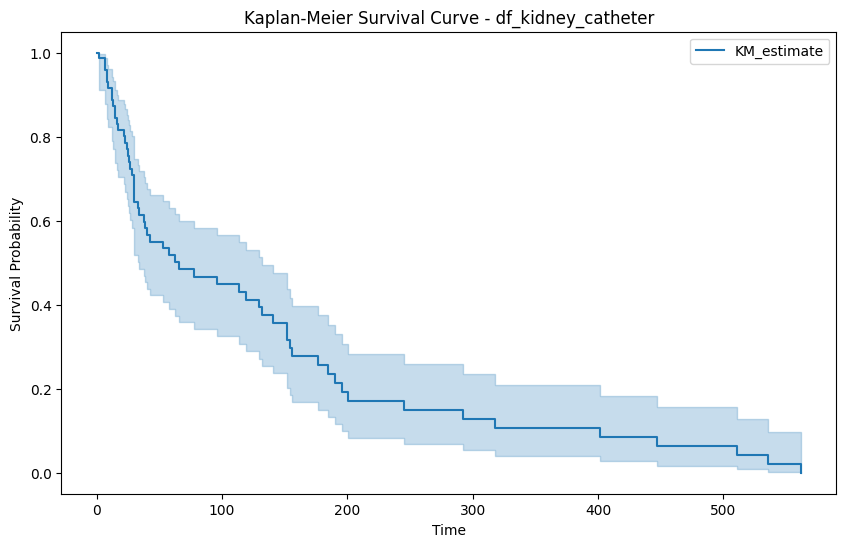

In [16]:
# Plot Kaplan-Meier Survival Curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - df_kidney_catheter')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

In [18]:
# Additional Metrics
event_table = survival_table_from_events(df[time_col], df[event_col])
median_survival_time = kmf.median_survival_time_
survival_prob_at_time_50 = kmf.predict([50])  # Access the first element of the array

print(f"Median Survival Time: {median_survival_time} units of time")
print(f"Survival Probability at Time 50: {survival_prob_at_time_50}")

Median Survival Time: 66.0 units of time
Survival Probability at Time 50: 0.5504997558943096


*** Stratified Kaplan-Meier Analysis with Log-Rank Test ***

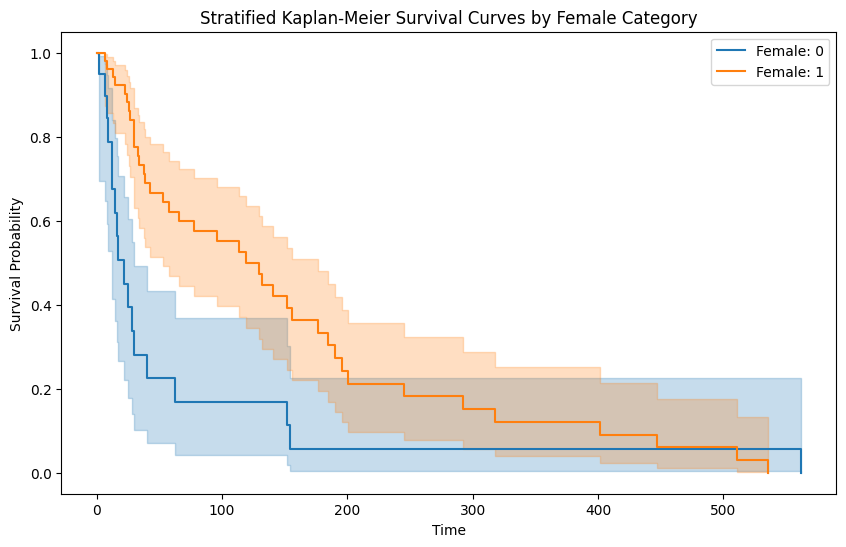

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          89.32 <0.005     68.01


In [24]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Assuming df_kidney_catheter is your DataFrame
kmf = KaplanMeierFitter()

# Stratify by the 'female' variable
female_categories = df['female'].unique()

# Plot and compare Kaplan-Meier survival curves
plt.figure(figsize=(10, 6))
for category in female_categories:
    subset_data = df[df['female'] == category]
    kmf.fit(subset_data['time'], event_observed=subset_data['infect'], label=f'Female: {category}')
    kmf.plot_survival_function()

# Add plot labels and legend
plt.title('Stratified Kaplan-Meier Survival Curves by Female Category')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# Perform log-rank test
results = logrank_test(df['time'], df['infect'], event_observed_A=df['female'] == female_categories[0], event_observed_B=df['female'] == female_categories[1])
print(results)